<a href="https://www.kaggle.com/code/anderaraujo/exploring-and-learning-nlp-python?scriptVersionId=158974164" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wc

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Installing Nltk

In [2]:
! python3 -m nltk.downloader wordnet
! unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpor

# Loading Data

In [3]:
# Loading Data
dados = pd.read_csv('/kaggle/input/imdb-ptbr/imdb-reviews-pt-br.csv')
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


# Separating Data

In [4]:
# Separating data
x = dados['text_pt']
y = dados['sentiment']

Here I set a function to remove numbers and underscores and another unwish characters. Portuguese language works with various accentuations, so we are not going to remove it.

In [5]:
# Fucntion to prepare text
def col_transf(col):
    new_col = col\
    .apply(lambda x: re.sub(r'\W+',' ', x))\
    .apply(lambda x: re.sub(r'(\d+)|(\d+\/*\d*)|[_]+','',x))\
    .apply(lambda x: x.lower())
    return new_col

I transformed the portuguese text for the algorithm

In [6]:
# Creating a new column with text prepared
dados['new_text_pt'] = col_transf(dados['text_pt'])

Let's create a corpus of every sentence from the column. It will be used to generate our World Cloud

In [7]:
corpus = " ".join([w for w in dados['new_text_pt']])

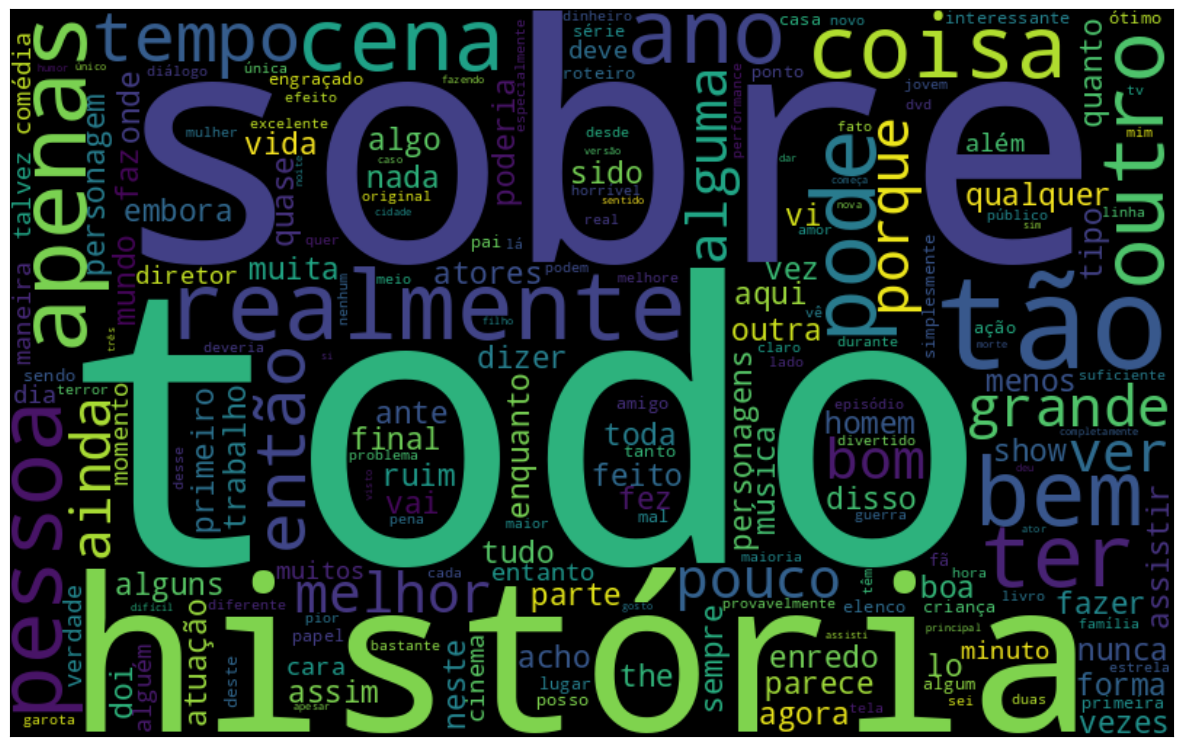

In [8]:
    # Printing Word Cloud
    stopwords_pt = stopwords.words('portuguese')
    stopwords_pt = stopwords_pt + ['filmes', 'filme']
    wc_cloud = wc(width=800, height=500, collocations = False, stopwords = stopwords_pt).generate(corpus)
    plt.figure(figsize = (15,15))
    plt.imshow(wc_cloud, interpolation = 'bilinear')
    plt.xticks([])
    plt.yticks([])
    plt.show()

Below I created a function to get the Bag of words transformed

In [9]:
def transformation(token_ls):
    lemmatizer = WordNetLemmatizer()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in token_ls]
    vectorizer = CountVectorizer(lowercase=False, stop_words=stopwords_pt, max_features=1000)
    bow = vectorizer.fit_transform(lemma_tokens) #bag_of_words
    tf_transformer = TfidfTransformer()
    bow_tf = tf_transformer.fit_transform(bow)
    cols = vectorizer.get_feature_names_out()
    df_bow = pd.DataFrame.sparse.from_spmatrix(bow, columns=cols)
    return df_bow
    

In [10]:
df_bow = transformation(x)
df_bow.shape

(49459, 1000)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df_bow, y, random_state=42)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8164981803477558

Using Random Forest model, not tuning it, our score was 81,50%

In [12]:
from sklearn.metrics import classification_report

y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82      6236
         pos       0.82      0.81      0.81      6129

    accuracy                           0.82     12365
   macro avg       0.82      0.82      0.82     12365
weighted avg       0.82      0.82      0.82     12365



Due to high computation needed to run a Grid Search, my session was expiring during my try